In [134]:
import pandas as pd
import numpy as np

data = pd.read_csv("transactions_n100000.csv")
data

,ticket_id,order_timestamp,location,item_name,item_count,lat,long
0,0x872a40,2019-02-28 18:33:00,4,shake,2,41.889047,-87.803605
1,0x872a40,2019-02-28 18:33:00,4,burger,2,41.889047,-87.803605
2,0x872a40,2019-02-28 18:33:00,4,fries,2,41.889047,-87.803605
3,0x598eb3,2019-09-18 11:59:00,5,burger,1,41.881818,-87.640234
4,0x598eb3,2019-09-18 11:59:00,5,salad,2,41.881818,-87.640234
...,...,...,...,...,...,...,...
260736,0x3c0582,2019-05-27 17:06:00,9,burger,3,41.524598,-87.849468
260737,0x3c0582,2019-05-27 17:06:00,9,salad,1,41.524598,-87.849468
260738,0x3c0582,2019-05-27 17:06:00,9,fries,4,41.524598,-87.849468
260739,0x104597,2019-12-10 00:25:00,2,burger,3,42.049306,-87.677606


In [135]:
item_name = data['item_name'].unique()
tick_id = data['ticket_id'].unique()

In [136]:
import time

def get_timeStamp(timestr):
    timeArray = time.strptime(timestr, "%Y-%m-%d %H:%M:%S")
    timeStamp = int(time.mktime(timeArray))
    time_in_day = timeArray.tm_hour * 60 + timeArray.tm_min

    return timeStamp, time_in_day

In [137]:
dic = {}
for tick in tick_id:
    dic[tick] = {x:0 for x in item_name}
dic

{'0x872a40': {'shake': 0, 'burger': 0, 'fries': 0, 'salad': 0},
 '0x598eb3': {'shake': 0, 'burger': 0, 'fries': 0, 'salad': 0},
 '0x5646c2': {'shake': 0, 'burger': 0, 'fries': 0, 'salad': 0},
 '0x4022cf': {'shake': 0, 'burger': 0, 'fries': 0, 'salad': 0},
 '0x7a39d9': {'shake': 0, 'burger': 0, 'fries': 0, 'salad': 0},
 '0x812cb8': {'shake': 0, 'burger': 0, 'fries': 0, 'salad': 0},
 '0x2d1b63': {'shake': 0, 'burger': 0, 'fries': 0, 'salad': 0},
 '0x708ff0': {'shake': 0, 'burger': 0, 'fries': 0, 'salad': 0},
 '0x69356d': {'shake': 0, 'burger': 0, 'fries': 0, 'salad': 0},
 '0x50a86b': {'shake': 0, 'burger': 0, 'fries': 0, 'salad': 0},
 '0x1eef23': {'shake': 0, 'burger': 0, 'fries': 0, 'salad': 0},
 '0x7acc40': {'shake': 0, 'burger': 0, 'fries': 0, 'salad': 0},
 '0x23eaa7': {'shake': 0, 'burger': 0, 'fries': 0, 'salad': 0},
 '0x96a841': {'shake': 0, 'burger': 0, 'fries': 0, 'salad': 0},
 '0x7dfc2b': {'shake': 0, 'burger': 0, 'fries': 0, 'salad': 0},
 '0x5fcd54': {'shake': 0, 'burger': 0, '

In [138]:
for t_id, o_ts, loc, it_n, it_c, lat, long in zip(data['ticket_id'], data['order_timestamp'],data['location'],data['item_name'],data['item_count'],data['lat'],data['long']):
    _,dic[t_id]['order_timestamp'] = get_timeStamp(o_ts)
    dic[t_id]['location'] = loc
    dic[t_id][it_n] = it_c
    dic[t_id]['lat'] = lat
    dic[t_id]['long'] = long

In [139]:
df = pd.DataFrame(dic).T
df

,shake,burger,fries,salad,order_timestamp,location,lat,long
0x872a40,2.0,2.0,2.0,0.0,1113.0,4.0,41.889047,-87.803605
0x598eb3,0.0,1.0,3.0,2.0,719.0,5.0,41.881818,-87.640234
0x5646c2,0.0,0.0,3.0,3.0,760.0,3.0,41.884490,-87.627059
0x4022cf,0.0,0.0,4.0,4.0,745.0,4.0,41.889047,-87.803605
0x7a39d9,5.0,5.0,5.0,0.0,1041.0,7.0,41.794132,-88.010140
...,...,...,...,...,...,...,...,...
0x75c9e7,0.0,2.0,2.0,0.0,77.0,6.0,41.784576,-87.607565
0x66f1df,0.0,1.0,1.0,0.0,1439.0,6.0,41.784576,-87.607565
0x4e2756,4.0,4.0,4.0,0.0,989.0,8.0,41.894202,-87.620965
0x3c0582,3.0,3.0,4.0,1.0,1026.0,9.0,41.524598,-87.849468


In [140]:
df.iloc[:,[0,1,2,3,4,6,7]]

,shake,burger,fries,salad,order_timestamp,lat,long
0x872a40,2.0,2.0,2.0,0.0,1113.0,41.889047,-87.803605
0x598eb3,0.0,1.0,3.0,2.0,719.0,41.881818,-87.640234
0x5646c2,0.0,0.0,3.0,3.0,760.0,41.884490,-87.627059
0x4022cf,0.0,0.0,4.0,4.0,745.0,41.889047,-87.803605
0x7a39d9,5.0,5.0,5.0,0.0,1041.0,41.794132,-88.010140
...,...,...,...,...,...,...,...
0x75c9e7,0.0,2.0,2.0,0.0,77.0,41.784576,-87.607565
0x66f1df,0.0,1.0,1.0,0.0,1439.0,41.784576,-87.607565
0x4e2756,4.0,4.0,4.0,0.0,989.0,41.894202,-87.620965
0x3c0582,3.0,3.0,4.0,1.0,1026.0,41.524598,-87.849468


In [141]:
df.iloc[:,[0,1,2,3,4,6,7]].values

array([[ 2.0000000e+00,  2.0000000e+00,  2.0000000e+00, ...,
         1.1130000e+03,  4.1889047e+01, -8.7803605e+01],
       [ 0.0000000e+00,  1.0000000e+00,  3.0000000e+00, ...,
         7.1900000e+02,  4.1881818e+01, -8.7640234e+01],
       [ 0.0000000e+00,  0.0000000e+00,  3.0000000e+00, ...,
         7.6000000e+02,  4.1884490e+01, -8.7627059e+01],
       ...,
       [ 4.0000000e+00,  4.0000000e+00,  4.0000000e+00, ...,
         9.8900000e+02,  4.1894202e+01, -8.7620965e+01],
       [ 3.0000000e+00,  3.0000000e+00,  4.0000000e+00, ...,
         1.0260000e+03,  4.1524598e+01, -8.7849468e+01],
       [ 0.0000000e+00,  3.0000000e+00,  3.0000000e+00, ...,
         2.5000000e+01,  4.2049306e+01, -8.7677606e+01]])

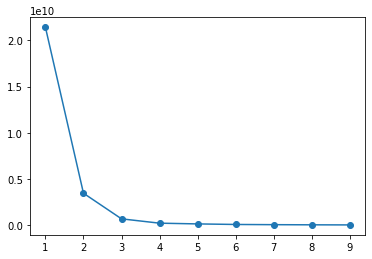

In [142]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

index = []
inertia = []
for i in range(9):
    model = KMeans(n_clusters=i+1)
    model.fit(df.iloc[:,[0,1,2,3,4,6,7]])
    index.append(i+1)
    inertia.append(model.inertia_)
    
plt.plot(index, inertia, '-o')

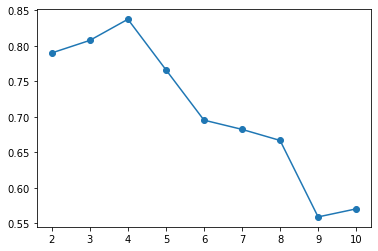

In [146]:
#optional 
from sklearn.metrics import silhouette_score

index = []
silhouette = []
sample = df.sample(n=2000).iloc[:,[0,1,2,3,4,6,7]]
for i in range(9):
    model = KMeans(n_clusters=i+2)
    model.fit(sample)
    index.append(i+2)
    silhouette.append(silhouette_score(sample, model.labels_))
    
plt.plot(index, silhouette, '-o')
plt.savefig('./silhourtte.jpg', dpi=1000)

In [156]:
pivot = pd.pivot_table(data = data1,index ='ticket_id',columns = 'item_name',values = 'item_count',aggfunc='sum')
pivot.fillna(value = 0,inplace = True)
pivot

item_name,burger,fries,salad,shake
ticket_id,,,,
0x100048,0.0,3.0,3.0,0.0
0x100057,1.0,1.0,0.0,0.0
0x1000ba,1.0,2.0,1.0,1.0
0x1000fb,4.0,5.0,1.0,4.0
0x10016e,3.0,3.0,0.0,3.0
...,...,...,...,...
0xffddf,3.0,3.0,0.0,3.0
0xffe25,2.0,2.0,0.0,0.0
0xffec9,0.0,1.0,1.0,0.0


In [157]:
k3= KMeans(n_clusters=3)
k3.fit(pivot)
k3.cluster_centers_

array([[0.28978587, 2.88993355, 2.60014767, 0.11223234],
       [1.21417669, 1.49333496, 0.27915827, 0.38647048],
       [3.93799921, 4.08471913, 0.14671992, 3.36778185]])

In [158]:
k4= KMeans(n_clusters=4)
k4.fit(pivot)
k4.cluster_centers_

array([[1.06774986, 1.35548396, 0.2877341 , 0.22967272],
       [4.28716872, 4.36893204, 0.08176332, 4.02881134],
       [0.27227083, 2.87835554, 2.60608471, 0.09475045],
       [2.97483743, 3.2363585 , 0.26152106, 2.01102629]])

In [154]:
import pandas as pd
data1= pd.read_csv('transactions_n100000.csv')
data1

,ticket_id,order_timestamp,location,item_name,item_count,lat,long
0,0x872a40,2019-02-28 18:33:00,4,shake,2,41.889047,-87.803605
1,0x872a40,2019-02-28 18:33:00,4,burger,2,41.889047,-87.803605
2,0x872a40,2019-02-28 18:33:00,4,fries,2,41.889047,-87.803605
3,0x598eb3,2019-09-18 11:59:00,5,burger,1,41.881818,-87.640234
4,0x598eb3,2019-09-18 11:59:00,5,salad,2,41.881818,-87.640234
...,...,...,...,...,...,...,...
260736,0x3c0582,2019-05-27 17:06:00,9,burger,3,41.524598,-87.849468
260737,0x3c0582,2019-05-27 17:06:00,9,salad,1,41.524598,-87.849468
260738,0x3c0582,2019-05-27 17:06:00,9,fries,4,41.524598,-87.849468
260739,0x104597,2019-12-10 00:25:00,2,burger,3,42.049306,-87.677606


In [60]:
ticket_item_total_pivot = pd.pivot_table(data = data1,index ='ticket_id',columns = 'item_name',values = 'item_count',aggfunc='sum')
data1['order_timestamp'] = pd.to_datetime(data1['order_timestamp']) 
data1['order_month']=data1['order_timestamp'].dt.month

In [68]:
month= pd.pivot_table(data = data1,index ='order_month',columns = 'item_name',values = 'item_count',aggfunc=np.sum)
month # each sum of amount of type of foods per month

item_name,burger,fries,salad,shake
order_month,,,,
1,16146,22257,6111,10851
2,14249,19821,5572,9563
3,15801,21923,6122,10558
4,15045,21051,6006,10063
5,15866,21756,5890,10685
6,15211,20933,5722,10020
7,15857,21803,5946,10452
8,15793,21828,6035,10621
9,15179,20882,5703,10162


In [67]:
store_ticket = pd.pivot_table(data = data1,index ='location',values = 'ticket_id',aggfunc='count')
store_ticket #each stores' orders

,ticket_id
location,
1,21216
2,37343
3,21257
4,33890
5,20291
6,37032
7,33547
8,22082
9,34083


In [109]:
data1['order_timestamp'] = pd.to_datetime(data1.order_timestamp, format='%Y-%m-%d %H:%M:%S')
data1['time']=data1['order_timestamp'].dt.hour
data1

,ticket_id,order_timestamp,location,item_name,item_count,lat,long,time
0,0x872a40,2019-02-28 18:33:00,4,shake,2,41.889047,-87.803605,18
1,0x872a40,2019-02-28 18:33:00,4,burger,2,41.889047,-87.803605,18
2,0x872a40,2019-02-28 18:33:00,4,fries,2,41.889047,-87.803605,18
3,0x598eb3,2019-09-18 11:59:00,5,burger,1,41.881818,-87.640234,11
4,0x598eb3,2019-09-18 11:59:00,5,salad,2,41.881818,-87.640234,11
...,...,...,...,...,...,...,...,...
260736,0x3c0582,2019-05-27 17:06:00,9,burger,3,41.524598,-87.849468,17
260737,0x3c0582,2019-05-27 17:06:00,9,salad,1,41.524598,-87.849468,17
260738,0x3c0582,2019-05-27 17:06:00,9,fries,4,41.524598,-87.849468,17
260739,0x104597,2019-12-10 00:25:00,2,burger,3,42.049306,-87.677606,0


In [119]:
timetable = pd.pivot_table(data = data1,index ='location',columns = 'time',values = 'item_count',aggfunc='count',margins=True,margins_name="total orders")
timetable #total amount of orders/hour

time,0,1,11,12,13,14,15,16,17,18,19,20,21,22,23,total orders
location,,,,,,,,,,,,,,,,
1,1675,429,3872,6022,3880,1066,201,247,782,1282,872,276,91,72,449,21216
2,21163,4891,817,1225,832,197,59,174,800,1270,827,218,33,60,4777,37343
3,1700,380,3751,6277,3797,1042,197,257,759,1390,823,285,98,69,432,21257
4,1604,385,807,1211,763,237,171,1756,6890,10885,6961,1686,162,22,350,33890
5,1000,344,3763,5994,3960,1011,206,269,843,1312,862,242,113,60,312,20291
6,20848,4996,713,1353,684,231,40,185,777,1175,785,265,36,41,4903,37032
7,1592,336,732,1276,836,215,208,1685,6466,10906,6911,1768,188,25,403,33547
8,1711,423,3858,5896,3959,965,184,320,1046,1601,1156,320,97,100,446,22082
9,1526,399,719,1195,774,241,197,1693,6952,11049,6913,1745,218,18,444,34083


In [120]:
itemtable = pd.pivot_table(data = data1,index ='item_name',columns = 'time',values = 'item_count',aggfunc='sum',margins=True,margins_name="Total")
itemtable #total amount of each item orders/hour

time,0,1,11,12,13,14,15,16,17,18,19,20,21,22,23,Total
item_name,,,,,,,,,,,,,,,,
burger,40324,9341,2761,4406,2742,786,783,6779,27711,44601,28125,7221,774,161,9331,185846
fries,41474,9798,18131,29241,18632,4970,1571,7425,29323,47193,29963,7830,1123,423,9770,256867
salad,1150,457,15370,24835,15890,4184,788,646,1612,2592,1838,609,349,262,439,71021
shake,7419,1779,915,1524,935,308,670,6355,26191,42268,26568,6806,695,54,1662,124149
Total,90367,21375,37177,60006,38199,10248,3812,21205,84837,136654,86494,22466,2941,900,21202,637883
